### Data Exploration and Preprocessing

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("seeds.csv")

In [3]:
# We can use the head method to view the first few rows of the dataset. 
# By default, head shows the first 5 rows of the dataset, but we can specify a different number by passing an argument to the method 
#(e.g. df.head(10) to show the first 10 rows).

In [4]:
# View the first few rows of the dataset
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
# we can use the tail method to view the last few rows of the dataset.
# View the last few rows of the dataset
df.tail()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
198,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [6]:
# We can use the shape attribute to view the shape of the dataset, which is a tuple containing the number of rows and columns in the dataset.
# View the shape of the dataset (number of rows, number of columns)
df.shape

(199, 8)

In [7]:
# We can use the columns attribute to view the column names of the dataset.
# View the column names
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [8]:
# We can use the dtypes attribute to view the data types of each column in the dataset.
# View the data types of each column
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [9]:
# We can use the describe method to view summary statistics of the dataset, such as the mean, standard deviation, minimum, and maximum values for each numeric column. Note that this method only applies to numeric columns and will not show summary statistics for non-numeric columns
# View summary statistics of the dataset
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [10]:
# Viewing correlation. The correlation coefficient is a measure of how strongly two variables are related. A coefficient of 1 indicates a perfect positive correlation, a coefficient of 0 indicates no correlation, and a coefficient of -1 indicates a perfect negative correlation.
df.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


In [11]:
# It is important to check for missing values in the dataset, as they can cause problems for downstream analyses. The isnull method returns a DataFrame of boolean values indicating whether each value in the dataset is missing or not. We can then use the sum method to count the number of missing values for each column.
# Check for missing values
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [12]:
# It is also important to check for duplicates in the dataset, as they can skew analysis results. The duplicated method returns a DataFrame of boolean values indicating whether each row in the dataset is a duplicate or not. We can then use the sum method to count the number of duplicate rows in the dataset.
# Check for duplicates
df.duplicated().sum()

0

### Visualization

In [13]:
# Visualization can be a powerful tool for exploring data and identifying patterns or relationships between variables. The pairplot function from the Seaborn library creates a matrix of scatter plots showing the relationships between all pairs of variables in the dataset.

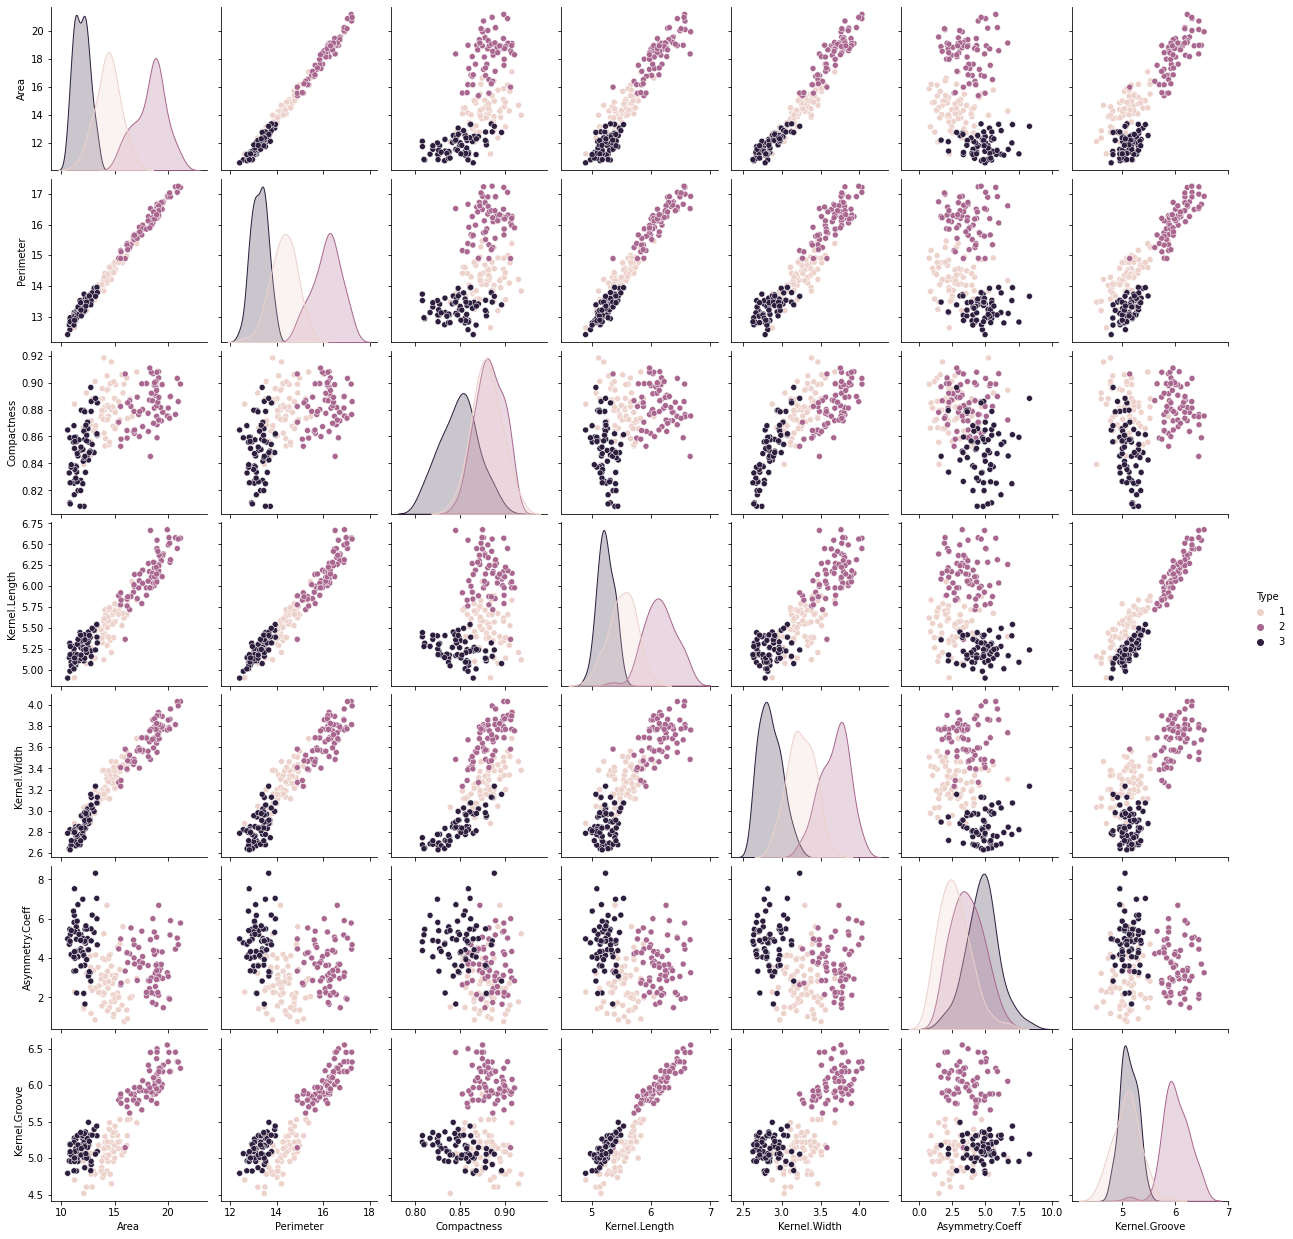

In [14]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df,hue='Type')
plt.show()

In [15]:
# By Plotting the data distribution plots we can see the distribution of each features in the dataset

# This is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

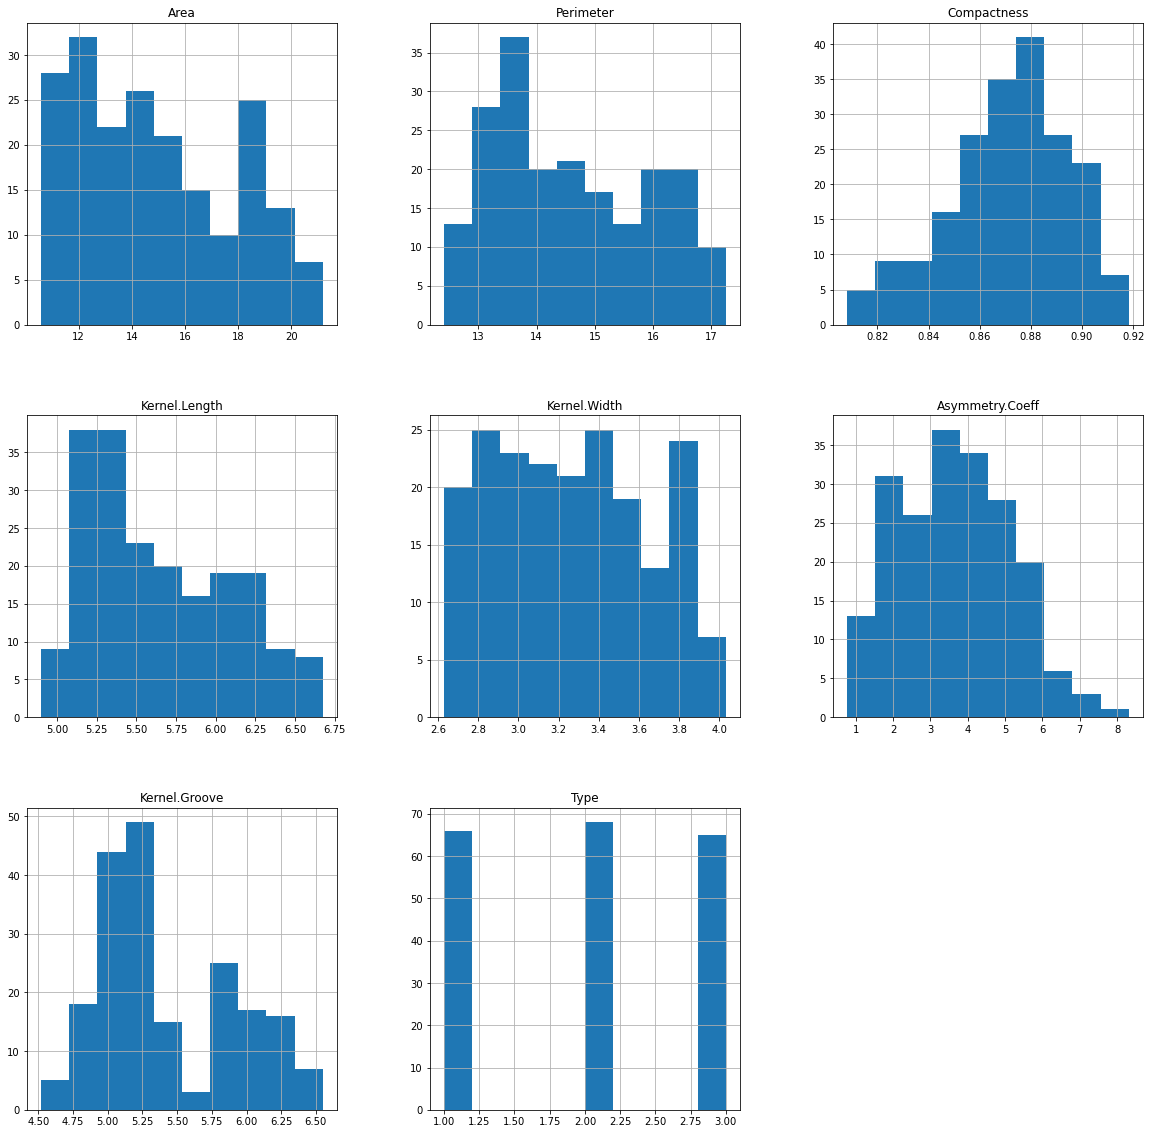

In [16]:
df.hist(figsize = (20,20))
plt.show()

In [17]:
# Here we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [18]:
df_Nan = df.copy(deep = True)
df_Nan[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove']] = df_Nan[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove']].replace(0,np.NaN)

In [19]:
df_Nan.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

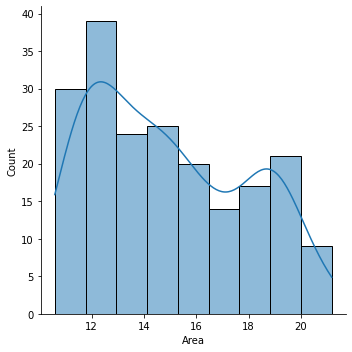

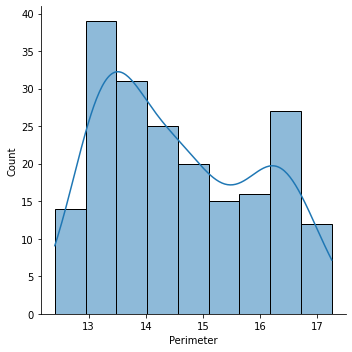

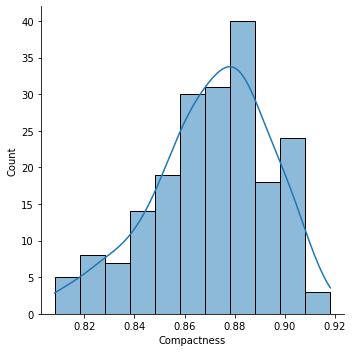

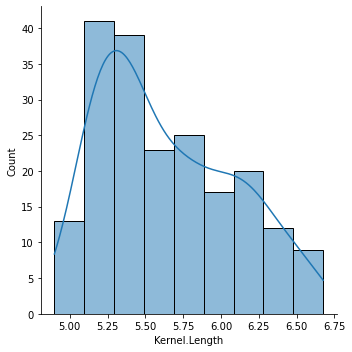

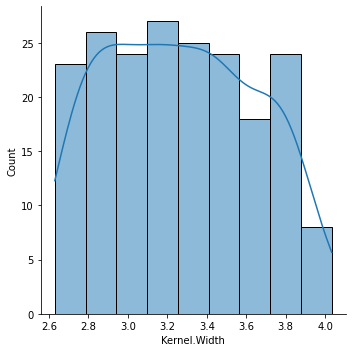

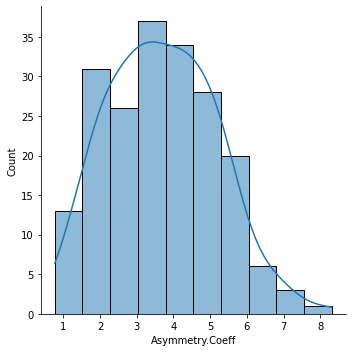

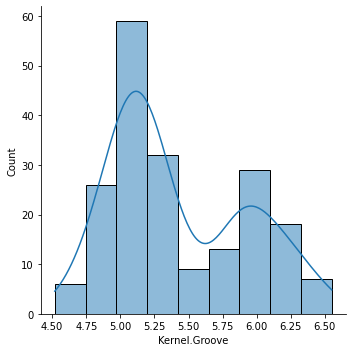

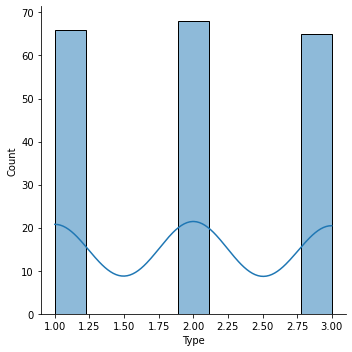

In [20]:
# Check the distribution of each column
for col in df_Nan.select_dtypes(include=['int', 'float']):
    sns.displot(df_Nan[col], kde=True)  # Plot the distribution of a numerical column
    plt.show()

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


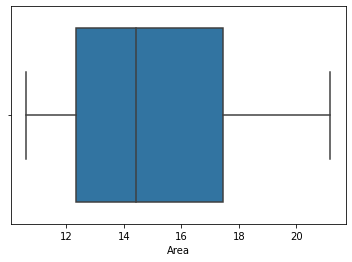

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


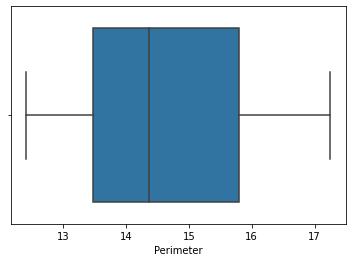

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


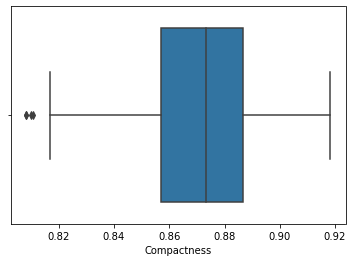

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


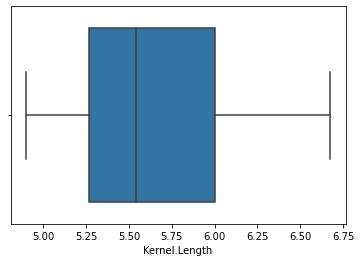

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


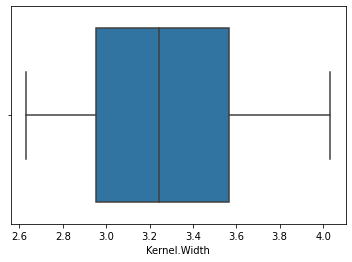

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


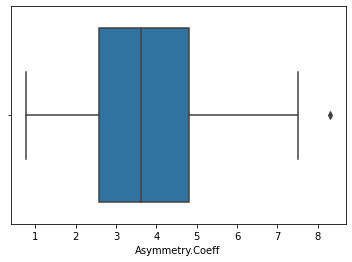

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


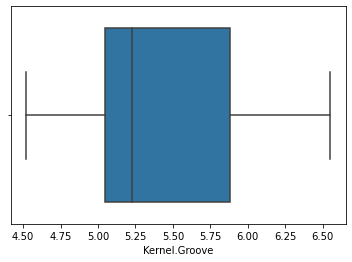

C:\Users\riyag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


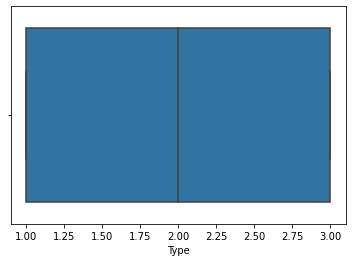

In [21]:
# Check for outliers or extreme values
for col in df_Nan.select_dtypes(include=['int', 'float']):
    sns.boxplot(df_Nan[col])  # Plot a boxplot of a numerical column
    plt.show()

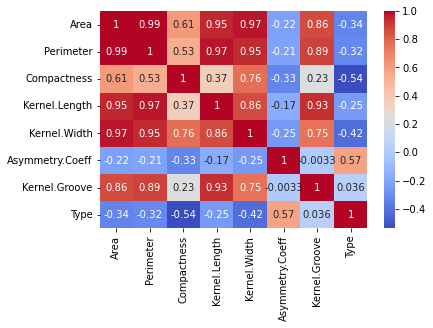

In [22]:
# Check for multicollinearity between variables
sns.heatmap(df_Nan.corr(), cmap='coolwarm', annot=True)  # Create a heatmap of the correlations between all pairs of numerical variables
plt.show()

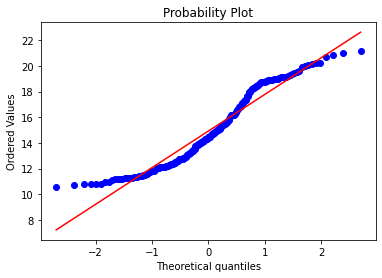

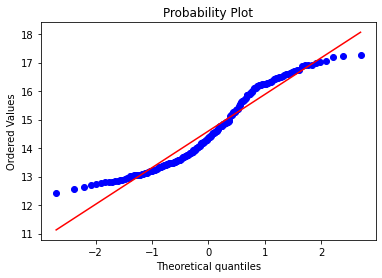

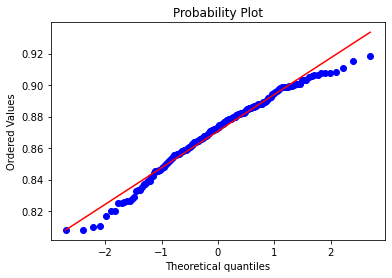

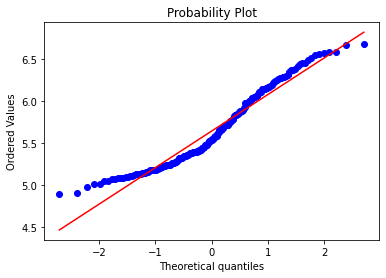

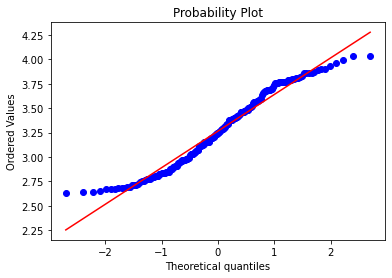

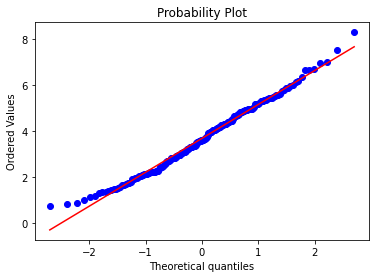

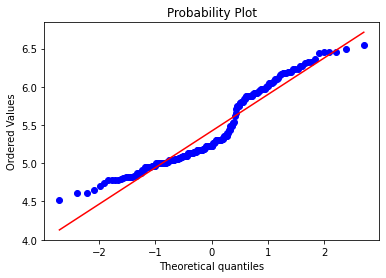

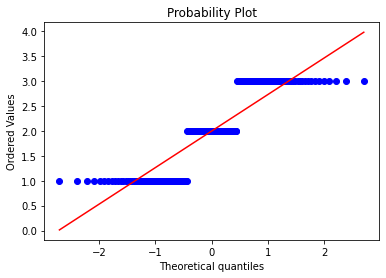

In [23]:
#Check for normality of data distribution
for col in df_Nan.select_dtypes(include=['int', 'float']):
    stats.probplot(df_Nan[col], plot=plt)  # Create a probability plot of a numerical column
    plt.show()

### Scaling the Data

In [24]:
# Before scaling down the data
df_Nan.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [25]:
sc_X = StandardScaler()
ScaledDataSet =  pd.DataFrame(sc_X.fit_transform(df_Nan.drop(["Type"],axis = 1),), columns=['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove'])
# After scaling the data
ScaledDataSet.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825


### Model Building

In [26]:
#Splitting the dataset
X = ScaledDataSet
y = df_Nan['Type']

In [27]:
# Split the data into training and testing data using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)
X_train

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
51,-0.202135,-0.241617,0.528321,-0.314481,-0.176306,-0.252976,-0.400126
166,-1.414098,-1.549809,-0.507733,-1.496462,-1.177976,0.731758,-0.727709
139,-1.273332,-1.121395,-2.326202,-0.822981,-1.533065,1.683100,-0.296357
111,1.387494,1.227230,1.585870,0.921740,1.673338,0.432590,0.670114
114,1.754860,1.762747,0.442341,1.920661,1.567341,-0.433567,1.829881
...,...,...,...,...,...,...,...
151,-0.957466,-0.662380,-2.695915,-0.563081,-1.379370,0.767195,-0.408265
67,0.659629,0.821767,-0.365867,0.801960,0.578921,0.664973,0.928519
25,-0.651900,-0.639430,-0.288485,-0.560821,-0.634742,-0.222309,-1.211962
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952


In [28]:
# Building the model using RandomForest

In [29]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [30]:
rfc_train = rfc.predict(X_train)
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [31]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9090909090909091


In [32]:
print(classification_report(y_test, predictions))
print("-----------------")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.93      0.74      0.82        19
           2       1.00      1.00      1.00        25
           3       0.81      0.95      0.88        22

    accuracy                           0.91        66
   macro avg       0.91      0.90      0.90        66
weighted avg       0.92      0.91      0.91        66

-----------------
[[14  0  5]
 [ 0 25  0]
 [ 1  0 21]]


In [33]:
# Building the model using DecisionTree

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
predictionsD = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.9090909090909091


In [36]:
print(classification_report(y_test, predictionsD))
print("----------------------------------------------------")
print(confusion_matrix(y_test, predictionsD))

              precision    recall  f1-score   support

           1       0.84      0.84      0.84        19
           2       1.00      0.96      0.98        25
           3       0.87      0.91      0.89        22

    accuracy                           0.91        66
   macro avg       0.90      0.90      0.90        66
weighted avg       0.91      0.91      0.91        66

----------------------------------------------------
[[16  0  3]
 [ 1 24  0]
 [ 2  0 20]]


### Feature Importance

In [37]:
# Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [38]:
rfc.feature_importances_

array([0.20427653, 0.18317925, 0.05605495, 0.10741212, 0.13569117,
       0.0867072 , 0.22667879])

<AxesSubplot:>

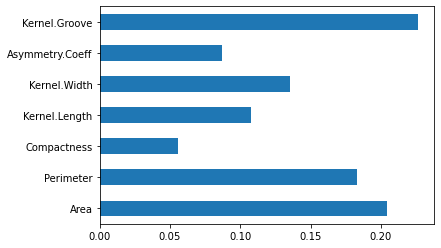

In [39]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [40]:
# Here from the above graph, it is clearly visible that Kernal Groove as a feature is the most important in this dataset.

In [41]:
# Saving Model – Random Forest

In [42]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([2, 2, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3,
       1, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 1, 1,
       3, 1, 3, 1, 1, 2, 3, 3, 1, 3, 2, 3, 2, 2, 3, 3, 3, 1, 1, 2, 2, 3],
      dtype=int64)

Here is the analysis of the Seeds dataset using machine learning algorithms. The dataset consists of 199 observations with eight features such as Area, Perimeter, Compactness, Kernel.Length, Kernel.Width, Asymmetry.Coeff, Kernel.Groove, and Type. In this report, we will use standardization, random forest, decision trees, and pickle to analyze and visualize the dataset.

Data preprocessing:

We have loaded the dataset and done the exploratory data analytics and checked for missing values, where we found none. Also, the data is visualised using matplotlib and seaborn.Then we standardized the dataset using the StandardScaler function of scikit-learn and created a new dataframe "ScaledDataSet". The scaled dataset was then split into X and y variables, where X consists of all columns except the target variable and y consists of the target variable 'Type'.

Machine Learning Model building:

Two models were trained on the dataset, namely Random Forest Classifier and Decision Tree Classifier. Random Forest Classifier achieved an accuracy of 0.91, and Decision Tree Classifier also achieved an accuracy of 0.91. For both classifiers, we have generated a classification report to evaluate their performance.

Feature Importance:

We used the feature_importances_ attribute of the Random Forest Classifier to get the feature importance score for each feature in the dataset. The graph shows that the Kernel Groove feature is the most important feature in this dataset.

Saving the model:

Lastly, we saved the Random Forest Classifier model using pickle. Firstly, we used the dump() function to save the model, and then we loaded the saved model and used it to make predictions.

Conclusion:

We have successfully analyzed the Seeds dataset using machine learning algorithms such as Random Forest Classifier and Decision Tree Classifier. We have also evaluated their performance using classification reports. Furthermore, we have visualized the feature importance score and saved the Random Forest Classifier model using pickle. These findings can be used by agricultural researchers to develop new strategies to improve the yield of wheat crops.